In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('reviews_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Example reviews
print(data['Review'].head())

       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                                      ['No Images']  
2  ['https://media.consumeraffairs.com/files/cach...  
3                                      [

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

# Display preprocessed reviews
print(data['Cleaned_Review'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    amber ladonna starbucks southwest parkway alwa...
1    starbucks fire station 436 altamonte springs f...
2    wanted go way recognize starbucks employee bil...
3    friend starbucks card work thankful worker pai...
4    kick drinking 5 cups warm water work instacart...
Name: Cleaned_Review, dtype: object


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Cleaned_Review'].apply(get_sentiment)

# Display sentiment analysis results
print(data[['Review', 'Cleaned_Review', 'Sentiment']].head())

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                      Cleaned_Review Sentiment  
0  amber ladonna starbucks southwest parkway alwa...  Positive  
1  starbucks fire station 436 altamonte springs f...  Positive  
2  wanted go way recognize starbucks employee bil...  Negative  
3  friend starbucks card work thankful worker pai...  Positive  
4  kick drinking 5 cups warm water work instacart...  Positive  


Sentiment  Negative   Neutral  Positive
Rating                                 
1.0        0.532151  0.044346  0.423503
2.0        0.373737  0.070707  0.555556
3.0        0.181818  0.060606  0.757576
4.0        0.102564       NaN  0.897436
5.0        0.060241  0.012048  0.927711


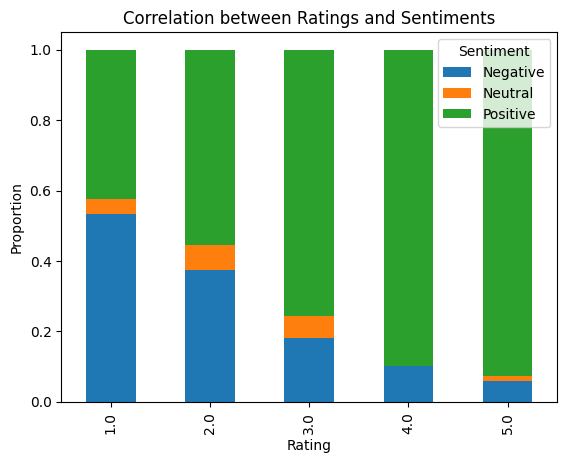

Common words in positive reviews: [('starbucks', 568), ('coffee', 368), ('drink', 153), ('one', 153), ('customer', 145), ('get', 142), ('time', 138), ('store', 134), ('service', 124), ('would', 124)]
Common words in negative reviews: [('starbucks', 446), ('coffee', 216), ('customer', 132), ('get', 127), ('service', 126), ('drink', 122), ('store', 120), ('one', 116), ('said', 109), ('order', 105)]


In [7]:
# Correlation between ratings and sentiment
rating_sentiment_corr = data.groupby('Rating')['Sentiment'].value_counts(normalize=True).unstack()
print(rating_sentiment_corr)

# Visualize the correlation
rating_sentiment_corr.plot(kind='bar', stacked=True)
plt.title('Correlation between Ratings and Sentiments')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.show()

# Common themes in positive and negative reviews
positive_reviews = data[data['Sentiment'] == 'Positive']['Cleaned_Review']
negative_reviews = data[data['Sentiment'] == 'Negative']['Cleaned_Review']

from collections import Counter

positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

print('Common words in positive reviews:', positive_word_freq.most_common(10))
print('Common words in negative reviews:', negative_word_freq.most_common(10))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['Cleaned_Review'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Display topics
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 0:
['employees', 'people', 'asked', 'customer', 'drink', 'order', 'like', 'said', 'coffee', 'starbucks']
Topic 1:
['friendly', 'good', 'customer', 'people', 'great', 'drinks', 'service', 'starbucks', 'like', 'coffee']
Topic 2:
['gift', 'time', 'money', 'told', 'store', 'service', 'customer', 'coffee', 'card', 'starbucks']
Topic 3:
['rewards', 'service', 'new', 'drink', 'free', 'customer', 'time', 'coffee', 'stars', 'starbucks']
Topic 4:
['said', 'went', 'customer', 'order', 'manager', 'time', 'store', 'drink', 'coffee', 'starbucks']


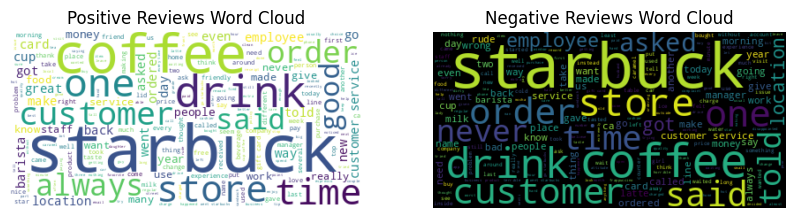

In [9]:
from wordcloud import WordCloud

# Word clouds for positive and negative reviews
positive_wordcloud = WordCloud(background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(background_color='black').generate(' '.join(negative_reviews))

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

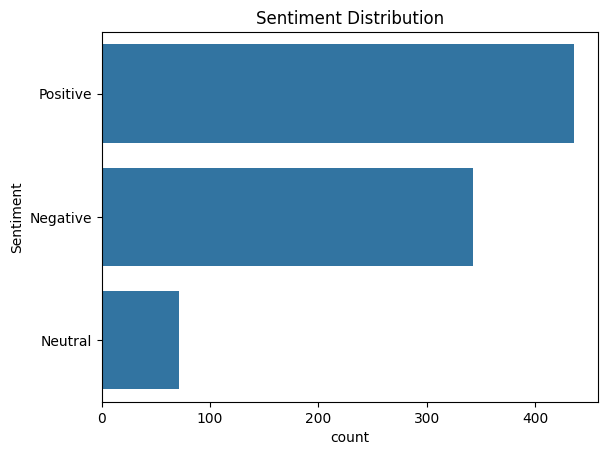

In [10]:
# Sentiment distribution plot
sns.countplot(data['Sentiment'])
plt.title('Sentiment Distribution')
plt.show()

In [11]:
# Generate report
report = f"""
Customer Sentiment and Insights through Starbucks Review Analysis
=================================================================

Sentiment Analysis Results
---------------------------
- Positive reviews: {len(data[data['Sentiment'] == 'Positive'])}
- Neutral reviews: {len(data[data['Sentiment'] == 'Neutral'])}
- Negative reviews: {len(data[data['Sentiment'] == 'Negative'])}

Common Themes in Reviews
------------------------
Positive themes:
{positive_word_freq.most_common(10)}

Negative themes:
{negative_word_freq.most_common(10)}

Topic Modeling
--------------
Identified topics:
{[' '.join([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]) for topic in lda.components_]}

Actionable Insights
-------------------
- Key areas for improvement: [list areas based on negative themes]
- Opportunities to enhance customer satisfaction: [list areas based on positive themes]

Visualizations
--------------
- Sentiment distribution plot
- Word clouds for positive and negative reviews
"""

print(report)


Customer Sentiment and Insights through Starbucks Review Analysis

Sentiment Analysis Results
---------------------------
- Positive reviews: 436
- Neutral reviews: 71
- Negative reviews: 343

Common Themes in Reviews
------------------------
Positive themes:
[('starbucks', 568), ('coffee', 368), ('drink', 153), ('one', 153), ('customer', 145), ('get', 142), ('time', 138), ('store', 134), ('service', 124), ('would', 124)]

Negative themes:
[('starbucks', 446), ('coffee', 216), ('customer', 132), ('get', 127), ('service', 126), ('drink', 122), ('store', 120), ('one', 116), ('said', 109), ('order', 105)]

Topic Modeling
--------------
Identified topics:
['employees people asked customer drink order like said coffee starbucks', 'friendly good customer people great drinks service starbucks like coffee', 'gift time money told store service customer coffee card starbucks', 'rewards service new drink free customer time coffee stars starbucks', 'said went customer order manager time store dri